In [1]:
%%capture
%run ./read_data.ipynb

ref: 
https://www.kaggle.com/code/thanhhuynh/linear-regression-and-regularization-ford


### Lasso 

In [2]:
from sklearn.linear_model import Lasso

In [3]:
lr = Lasso()
lr.fit(X_train,y_train)

Lasso()

In [4]:
lr.coef_

array([-1389.85284992,  -830.95433613, -1821.2769009 ,  2834.46901405,
       -2330.74433658,     0.        ,  2061.36783665, -1092.02303455,
       -2394.64127508, -1103.11619106, -2716.81941345, -3088.1835565 ,
          -0.        ,   612.65101787,  1306.90725773,  1180.25992668,
         914.75791636,  1209.39213584, -4470.26001873,   100.0586612 ,
       -1271.51220033,     0.        ,  -632.07115563,     0.        ])

In [5]:
train_test_report(lr)

Train score: 		         0.8937
Test score: 		         0.8939


<Figure size 432x288 with 0 Axes>

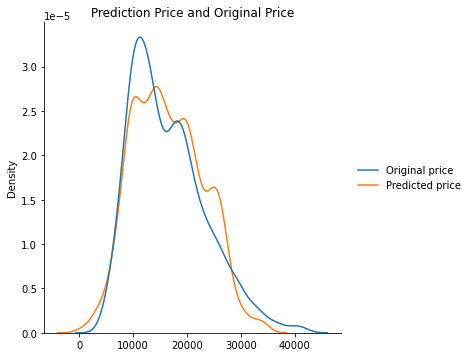

In [6]:
plot_prediction_compare_ori(lr)

<Figure size 432x288 with 0 Axes>

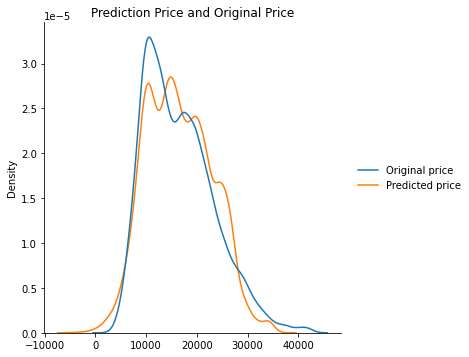

In [7]:
# prediction on train data
plot_prediction_compare_ori(lr, X_train, y_train)

In [8]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import pandas as pd
parameters={
    'alpha':[0.001,0.01,0.1,1,10,100,1000],
    'normalize':[True,False],
}

In [9]:
tuned_lr = GridSearchCV(lr, parameters, cv=5)
tuned_lr.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1342668617.5312576, tolerance: 39138914.13079114
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1335866923.6834984, tolerance: 39401503.43948791
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1342367054.055355, tolerance: 39508175.89226847
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'normalize': [True, False]})

Text(0, 0.5, 'Predicted Price')

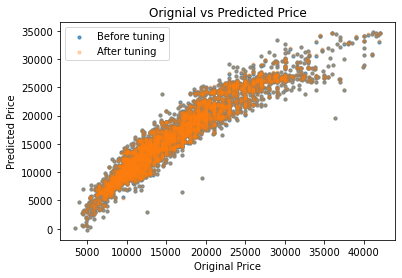

In [10]:
import matplotlib.pyplot as plt
y_predict = lr.predict(X_test)
df = pd.DataFrame({'Original price':y_test, 'Predicted price':y_predict})
plt.scatter(df['Original price'], df['Predicted price'],alpha=0.7,s=10)

y_predict = tuned_lr.predict(X_test)
df = pd.DataFrame({'Original price':y_test, 'Predicted price':y_predict})
plt.scatter(df['Original price'], df['Predicted price'],alpha=0.3,s=10)

plt.title('Orignial vs Predicted Price')
plt.legend(['Before tuning', 'After tuning'])
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')

<Figure size 432x288 with 0 Axes>

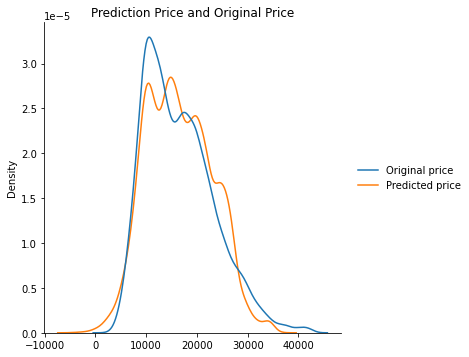

In [11]:
plot_prediction_compare_ori(tuned_lr, X_train, y_train)

In [12]:
train_test_report(tuned_lr)

Train score: 		         0.8937
Test score: 		         0.8939


In [13]:
gs_report(tuned_lr)

Best score: 			         0.8929
Best parameters: 		{'alpha': 0.01, 'normalize': True}
Best estimator: 		Lasso(alpha=0.01, normalize=True)


In [14]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.8928501258713002

In [15]:
cross_val_score(tuned_lr, X_train, y_train, cv=5).mean()

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1088173432.0324898, tolerance: 31750532.035445962
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1067769671.31324, tolerance: 31025595.242601007
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1091492321.7512321, tolerance: 31958897.796989992
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

0.8928604992013357

In [16]:
regression_report_compare_model(lr, tuned_lr)

Before tuning hyperparameter: 

Accuracy score: 			         0.8939
R-squared score: 			         0.8939
Mean Absolute Error(MAE): 		      1697.3014
Mean Squared Error (MSE): 		   5147503.2735
Root Mean Squared Error (RSME): 	      2268.8110
-------------------------------------------------------
After tuning hyper parameter: 

Accuracy score: 			         0.8939
R-squared score: 			         0.8939
Mean Absolute Error(MAE): 		      1697.9307
Mean Squared Error (MSE): 		   5147329.7606
Root Mean Squared Error (RSME): 	      2268.7727


In [17]:
tuned_lr.best_estimator_.coef_

array([-1.39001722e+03, -8.33062625e+02, -1.80876074e+03,  2.82997554e+03,
       -2.33186092e+03,  1.16403036e+03,  3.21916402e+03, -0.00000000e+00,
       -1.34723435e+03, -1.56493406e+01, -1.64217872e+03, -2.03314559e+03,
        1.10272166e+03,  1.74534798e+03,  2.42565052e+03,  2.30123568e+03,
        2.09984702e+03,  2.34409725e+03, -3.41099216e+03,  1.01333808e+02,
       -1.27605162e+03,  0.00000000e+00, -6.56177794e+02,  4.75893374e-12])

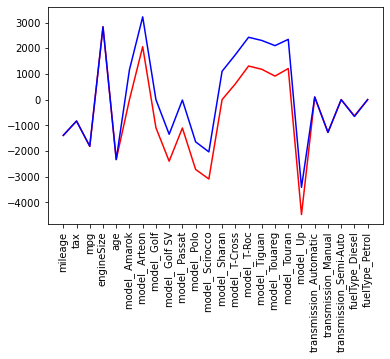

In [18]:
plt.plot(X_train.columns,lr.coef_,color='red')
plt.plot(X_train.columns,tuned_lr.best_estimator_.coef_,color='blue')
plt.xticks(rotation=90)
plt.show()